<h1><center>  lab 4: Knowledge Inference Models </center>
    
<img src="https://files.realpython.com/media/Encodings--Number-Systems_Watermarked.906d62e907dc.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\
```Date: June 8th 2023```

```Image source: https://realpython.com/python-encodings-guide/g```



<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [22]:
#!pip install { } ! in case you run into the `package not avaialble` error
import numpy as np
import pandas as pd

# %pip install pyBKT 

import pyBKT # make sure you download this package first #
from pyBKT.models import Model

# Bayesian Knowledge Tracing
## Dataset
> We will use the `cognitivetutor` data. \
> Once you ran the following code, go back to your jupyter notebook directory to see whether your datasets (`ct.csv`) are stored correctly
> **pyBKT**: https://github.com/CAHLR/pyBKT


### Fetch our dataset from github to your local desk

In [23]:
model = Model(seed = 42, num_fits = 1, parallel = True)

model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

### Let's import your dataset using `pandas` 

In [24]:
#### Your code here #######
ct_df =pd.read_csv('ct.csv', encoding = 'latin')
ct_df.head()

#### Mini task 

# (1) How many students?
np.unique(ct_df['Anon Student Id'])

# (2) How many steps for each student (on average)?
# grouped_data = pd.DataFrame.groupby(ct_df, by = ct_df["Anon Student Id"])
# grouped_data["ArithmeticError"].count().mean()

print(ct_df.groupby(by = ct_df["Anon Student Id"]).count().mean())

# (3) How many types of knowledge components (KCs)? 
print(np.unique(ct_df["KC(Default)"]))


Unnamed: 0                    28.71721
Row                           28.71721
Problem Hierarchy             28.71721
Problem Name                  28.71721
Problem View                  28.71721
Step Name                     28.71721
Step Start Time               28.70698
First Transaction Time        28.71721
Correct Transaction Time      28.46848
Step End Time                 28.71721
Step Duration (sec)           28.70698
Correct Step Duration (sec)   17.78024
Error Step Duration (sec)     10.92675
Correct First Attempt         28.71721
Incorrects                    28.71721
Hints                         28.71721
Corrects                      28.71721
KC(Default)                   28.71721
Opportunity(Default)          28.71721
dtype: float64
['Calculate part in proportion with fractions'
 'Calculate total in proportion with fractions' 'Calculate unit rate'
 'Finding the intersection, GLF' 'Finding the intersection, Mixed'
 'Finding the intersection, SIF' 'Plot decimal - thousandths

<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: BKT usign pyBKT 
 > **STEP 1**: Load a bkt model - `model = Model(seed = 42, num_fits = 1, parallel = True)`\
 > **STEP 2**: Fit (Learn) model weights `model.fit(data_path = "ct.csv")`\
 > **STEP 3**: Evaluate the model fit `model.evaluate(data = ct_df)` for RMSE and `model.evaluate(data = ct_df, metri='auc')` for AUC.\
 > **STEP 4**: Extract the model parameters (weights) using `model.params()`

In [25]:
### YOUR CODE HERE ###################
model = Model(seed = 42, num_fits = 1, parallel = True)
fit = model.fit(data_path = "ct.csv")
eval = model.evaluate(data = ct_df, metric = "auc")
print(model.params())

# Hand Calculate the Odds of Getting Skill Right
# Plot non-term improp fract
print(0.78*0.20 + (1-0.78)*0.15)
# Plot imperfect radical
print(0.41*0.29 + (1-0.41)*0.14)

                                                               value
skill                                        param   class          
Plot non-terminating improper fraction       prior   default 0.62672
                                             learns  default 0.22564
                                             guesses default 0.07608
                                             slips   default 0.25098
                                             forgets default 0.00000
Plot imperfect radical                       prior   default 0.38605
                                             learns  default 0.10927
                                             guesses default 0.07117
                                             slips   default 0.38644
                                             forgets default 0.00000
Plot terminating proper fraction             prior   default 0.30135
                                             learns  default 0.10254
                                  

> `learns`: the probability of transitioning to the "knowing" state given "not known". \\
> `forgets`: the probability of transitioning to the "not knowing" state given "known". \\
> `prior`: the prior probability of "knowing". 

The fitmodel also includes the following emission probabilities:

> `guesses`: the probability of guessing correctly, given "not knowing" state. \\
>`slips`: the probability of picking incorrect answer, given "knowing" state. \\


### Complex Model

In [26]:
# Train a simple BKT model on one skill in the CT dataset
# Note that calling fit deletes any previous trained BKT model!

skill_list = list(ct_df['KC(Default)'].unique()) #these are the unique skill set 
skill_acc = [] # accuracy for student task correctness will be saved here 
for s in skill_list: 
  model.fit(data_path = 'ct.csv', 
            skills = s,  # for a skill "s"
            ## This will provide parameters for each question within the skill if multiple Qs
            multigs = True, # multiple guessing 
            forgets=True, # allow forget parameters
            ## Can be True to just calculate for all questions within skill
            # multilearn = True)
            ## Can alos be set to a column name to calculate for all students 
            multilearn = 'Anon Student Id') 

  print(model.params())
  ## .evaluate gives accuracy estimates of the model
  acc = model.evaluate(data_path = 'ct.csv', metric = 'accuracy')
  skill_acc.append(acc)

                                                          value
skill                                  param   class           
Plot non-terminating improper fraction prior   default  0.74410
                                       learns  0I891Gg  0.48502
                                               17116XP9 0.33705
                                               1712bs2B 0.17924
                                               1715Zzr7 0.41931
...                                                         ...
                                       forgets x3A11ty  0.50258
                                               xFjwn    0.28626
                                               z3GhRzh  0.29511
                                               z7Zg3oy  0.15248
                                               zt5vuLM  0.16567

[537 rows x 1 columns]
                                          value
skill                  param   class           
Plot imperfect radical prior   default  0.04632


In [27]:
# %pip install seaborn

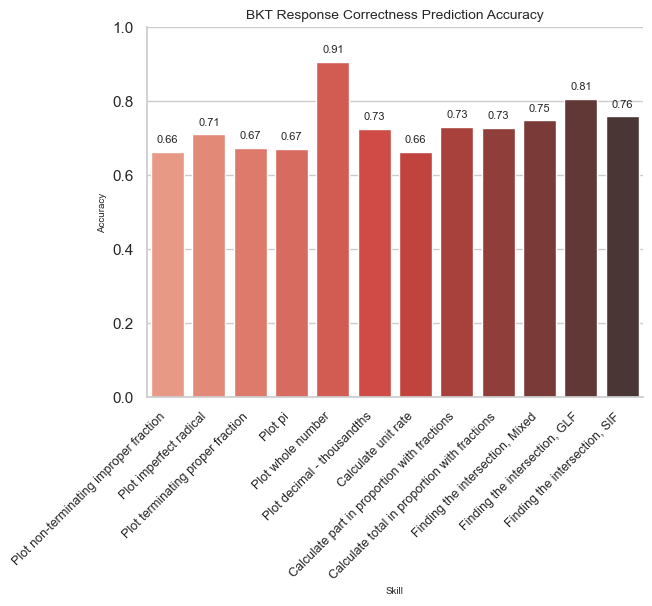

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming you have defined the DataFrame with skill_list and skill_acc
df = pd.DataFrame(zip(skill_list, skill_acc), columns=['Skill', 'Accuracy'])

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the bar graph
ax = sns.barplot(x='Skill', y='Accuracy', data=df, palette="Reds_d")

# Customize the graph
plt.title('BKT Response Correctness Prediction Accuracy', fontsize=10)
plt.xlabel('Skill', fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylim(0, 1)
#plt.ytick(fontsize=7)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Remove the top and right spines
sns.despine()

# Displaying the graph
#plt.tight_layout()
plt.show()

 > **STEP 5**: Conduct **5-fold CV** to evaluate the model prediction accuracy \\
 > (HINT: for model prediction you can use `model.crossvalidate(data_path = NAME OF YOUR DATA, folds = 5)`

In [29]:
from pyBKT.models import Model

# first: Define your model 
model.fit(data_path = 'ct.csv', 
            skills = 'Plot non-terminating improper fraction', 
            ## This will provide parameters for each question within the skill if multiple Qs
            multigs = True, # multiple guessing 
            forgets=True, # allow forget parameters
            ## Can be True to just calculate for all questions within skill
            # multilearn = True)
            ## Can alos be set to a column name to calculate for all students 
            multilearn = 'Anon Student Id') 

print(model.params())

# cross validation 
print(model.crossvalidate(data_path= "ct.csv", folds = 5, metric = "accuracy"))

# how do we interpret the results? 




                                                          value
skill                                  param   class           
Plot non-terminating improper fraction prior   default  0.61856
                                       learns  0I891Gg  1.00000
                                               17116XP9 1.00000
                                               1712bs2B 1.00000
                                               1715Zzr7 1.00000
...                                                         ...
                                       forgets x3A11ty  0.00000
                                               xFjwn    0.00000
                                               z3GhRzh  0.00000
                                               z7Zg3oy  0.00000
                                               zt5vuLM  0.00000

[537 rows x 1 columns]
                                              accuracy
skill                                                 
Plot non-terminating improper frac

### Advanced Topic: EM FIT 

In [8]:
import numpy as np
from pyBKT.generate import synthetic_data, random_model_uni
from pyBKT.fit import EM_fit
from copy import deepcopy

#parameters classes
num_gs = 1 #number of guess/slip classes
num_learns = 1 #number of learning rates

num_fit_initializations = 20

#true params used for synthetic data generation
p_T = 0.30
p_F = 0.00
p_G = 0.10
p_S = 0.03
p_L0 = 0.10

#generate synthetic model and data.
truemodel = {}

truemodel["As"] =  np.zeros((num_learns,2,2), dtype=np.float_)
for i in range(num_learns):
    truemodel["As"][i] = np.transpose([[1-p_T, p_T], [p_F, 1-p_F]])

truemodel["learns"] = truemodel["As"][:,1, 0,]
truemodel["forgets"] = truemodel["As"][:,0, 1]

truemodel["pi_0"] = np.array([[1-p_L0], [p_L0]])
truemodel["prior"] = truemodel["pi_0"][1][0]

truemodel["guesses"] = np.full(num_gs, p_G, dtype=np.float_)
truemodel["slips"] = np.full(num_gs, p_S, dtype=np.float_)

#can optionally set learn class sequence - set randomly by synthetic_data if not included
#truemodel["resources"] = np.random.randint(1, high = num_resources, size = sum(observation_sequence_lengths))

#data!
print("generating data...")
observation_sequence_lengths = np.full(500, 100, dtype=np.int) #specifies 500 students with 100 observations for synthetic data
data = synthetic_data.synthetic_data(truemodel, observation_sequence_lengths)

#fit models, starting with random initializations
print('fitting! each dot is a new EM initialization')

num_fit_initializations = 5
best_likelihood = float("-inf")

for i in range(num_fit_initializations):
	fitmodel = random_model_uni.random_model_uni(num_learns, num_gs) # include this line to randomly set initial param values
	(fitmodel, log_likelihoods) = EM_fit.EM_fit(fitmodel, data)
	if(log_likelihoods[-1] > best_likelihood):
		best_likelihood = log_likelihoods[-1]
		best_model = fitmodel

# compare the fit model to the true model

print('')
print('\ttruth\tlearned')
print('prior\t%.4f\t%.4f' % (truemodel['prior'], best_model["pi_0"][1][0]))
for r in range(num_learns):
    print('learn%d\t%.4f\t%.4f' % (r+1, truemodel['As'][r, 1, 0].squeeze(), best_model['As'][r, 1, 0].squeeze()))
for r in range(num_learns):
    print('forget%d\t%.4f\t%.4f' % (r+1, truemodel['As'][r, 0, 1].squeeze(), best_model['As'][r, 0, 1].squeeze()))

for s in range(num_gs):
    print('guess%d\t%.4f\t%.4f' % (s+1, truemodel['guesses'][s], best_model['guesses'][s]))
for s in range(num_gs):
    print('slip%d\t%.4f\t%.4f' % (s+1, truemodel['slips'][s], best_model['slips'][s]))

generating data...
fitting! each dot is a new EM initialization

	truth	learned
prior	0.1000	0.0990
learn1	0.3000	0.3335
forget1	0.0000	0.0000
guess1	0.1000	0.0938
slip1	0.0300	0.0288


<ipython-input-8-888bc746b94d>:39: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  observation_sequence_lengths = np.full(500, 100, dtype=np.int) #specifies 500 students with 100 observations for synthetic data


### Advanced Topic: IRT to BKT

NLLK: 2558.4062434467646 	 Score: 0.5971093044263776
NLLK: 2527.400803722845 	 Score: 0.6332429990966576
NLLK: 2498.5844682278675 	 Score: 0.6278229448961157
NLLK: 2471.5834266130273 	 Score: 0.6214995483288166
NLLK: 2446.26806082069 	 Score: 0.6214995483288166
NLLK: 2422.5124052189963 	 Score: 0.6142728093947606
NLLK: 2400.1998961267727 	 Score: 0.6142728093947606
NLLK: 2379.222713315843 	 Score: 0.6142728093947606
NLLK: 2359.4814350710226 	 Score: 0.6142728093947606
NLLK: 2340.8845767579382 	 Score: 0.6115627822944896
NLLK: 2323.3480827307817 	 Score: 0.6106594399277326
NLLK: 2306.794798306611 	 Score: 0.6088527551942186
NLLK: 2291.1539424418397 	 Score: 0.6061427280939476
NLLK: 2276.3605950972396 	 Score: 0.6052393857271906
NLLK: 2262.3552083219743 	 Score: 0.6043360433604336
NLLK: 2249.083146414076 	 Score: 0.6034327009936766
NLLK: 2236.4942578726545 	 Score: 0.6034327009936766
NLLK: 2224.5424800106093 	 Score: 0.6034327009936766
NLLK: 2213.185475847831 	 Score: 0.6034327009936766


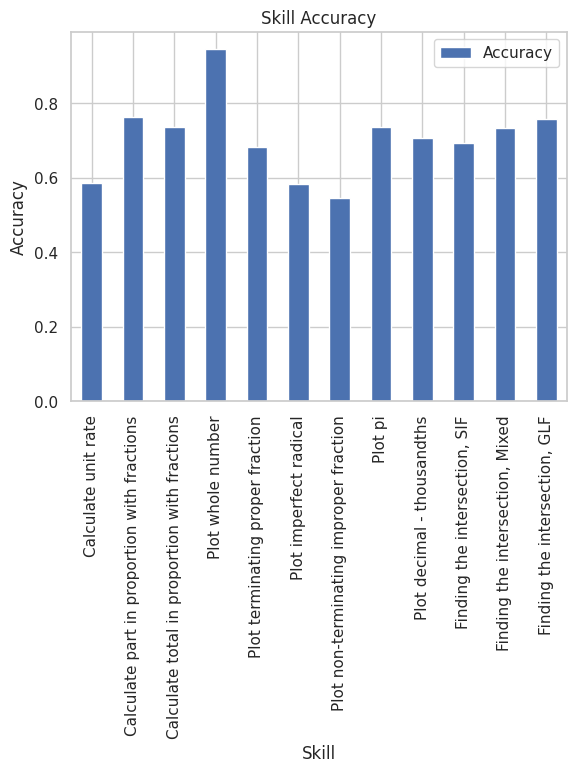

In [9]:
import numpy as np 
def sigmoid(x):
    """ Apply sigmoid function.
    """
    return np.exp(x) / (1 + np.exp(x))


def neg_log_likelihood(data, theta, beta):
    """ Compute the negative log-likelihood.

    You may optionally replace the function arguments to receive a matrix.

    :param data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param theta: Vector
    :param beta: Vector
    :return: float
    """
    log_lklihood = 0.
    for ind in np.arange(len(data["is_correct"])):
        i = data["user_id"][ind]
        j = data["question_id"][ind]
        cij = data["is_correct"][ind]

        theta_i = theta[i]
        beta_j = beta[j]
        diff = theta_i - beta_j
        log_lklihood += cij * diff - np.log(1 + np.exp(diff))
    return -log_lklihood


def update_theta_beta(data, lr, theta, beta):
    """ Update theta and beta using gradient descent.

    You are using alternating gradient descent. Your update should look:
    for i in iterations ...
        theta <- new_theta
        beta <- new_beta

    You may optionally replace the function arguments to receive a matrix.

    :param data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param lr: float
    :param theta: Vector
    :param beta: Vector
    :return: tuple of vectors
    """
    diff_theta_beta = np.expand_dims(theta, axis=1) - np.expand_dims(beta, axis=0)
    sig = sigmoid(diff_theta_beta)

    grad_theta = np.zeros_like(diff_theta_beta)
    grad_beta = np.zeros_like(diff_theta_beta)

    for ind in np.arange(len(data["is_correct"])):
        i = data["user_id"][ind]
        j = data["question_id"][ind]
        cij = data["is_correct"][ind]

        grad_theta[i, j] = cij - sig[i, j]
        grad_beta[i, j] = sig[i, j] - cij

    theta = theta + lr * np.sum(grad_theta, axis=1)
    beta = beta + lr * np.sum(grad_beta, axis=0)
    return theta, beta


def irt(data, val_data, lr, iterations, user_size, question_size):
    """ Train IRT model.

    You may optionally replace the function arguments to receive a matrix.

    :param data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param val_data: A dictionary {user_id: list, question_id: list,
    is_correct: list}
    :param lr: float
    :param iterations: int
    :return: (theta, beta, val_acc_lst)
    """
    # TODO: Initialize theta and beta.
    theta = np.zeros(user_size)
    beta = np.zeros(question_size)

    val_acc_lst = []
    neg_lld_lst = []
    val_lld_lst = []

    for i in range(iterations):
        neg_lld = neg_log_likelihood(data, theta=theta, beta=beta)
        score = evaluate(data=val_data, theta=theta, beta=beta)
        val_acc_lst.append(score)
        neg_lld_lst.append(neg_lld)
        val_lld_lst.append(neg_log_likelihood(val_data, theta=theta, beta=beta))
        print("NLLK: {} \t Score: {}".format(neg_lld, score))
        theta, beta = update_theta_beta(data, lr, theta, beta)

    # TODO: You may change the return values to achieve what you want.
    return theta, beta, val_acc_lst, neg_lld_lst, val_lld_lst


def evaluate(data, theta, beta):
    """ Evaluate the model given data and return the accuracy.
    :param data: A dictionary {user_id: list, question_id: list,
    is_correct: list}

    :param theta: Vector
    :param beta: Vector
    :return: float
    """
    pred = []
    for i, q in enumerate(data["question_id"]):
        u = data["user_id"][i]
        x = (theta[u] - beta[q]).sum()
        p_a = sigmoid(x)
        pred.append(p_a >= 0.5)
    return np.sum((data["is_correct"] == np.array(pred))) \
           / len(data["is_correct"])


def main(skill='Plot imperfect radical'):
    
    train_data = ct_df[ct_df['KC(Default)']==skill]
    train_data = train_data[['Anon Student Id', 'Problem Name', 'Correct First Attempt']]
    train_data.columns = ['user_id',"question_id","is_correct"]

    labels, levels = pd.factorize(train_data['user_id'])
    train_data['user_id'] = labels
    user_dic = dict(zip(levels, list(range(len(levels)))))

    labels, levels = pd.factorize(train_data['question_id'])
    train_data['question_id'] = labels
    question_dic = dict(zip(levels, list(range(len(levels)))))

    # You may optionally use the sparse matrix.
    from sklearn.model_selection import train_test_split 
    train_data, test_data = train_test_split(train_data, test_size=0.3)
    val_data, test_data = train_test_split(test_data, test_size=0.3)

    train_data = train_data.reset_index(); train_data = train_data.drop(columns=['index'])
    test_data = test_data.reset_index(); test_data = test_data.drop(columns=['index'])
    val_data = val_data.reset_index(); val_data = val_data.drop(columns=['index'])

    lr = 1e-2
    num_iteration = 50
    theta, beta, val_acc_lst, neg_lld_lst, val_lld_lst = irt(train_data, val_data, 
                                                             lr, num_iteration, 
                                                             user_size = len(user_dic), 
                                                             question_size = len(question_dic))

    print("Validation accuracy: {}".format(val_acc_lst[-1]))
    test_acc = evaluate(test_data, theta, beta)
    print("Test accuracy: {}".format(test_acc))
    return test_acc, user_dic, question_dic, theta, beta

skill_list = list(ct_df['KC(Default)'].unique())
skill_acc = []
for s in skill_list: 
  
  # Train the model on the data
  test_acc, user_dic, question_dic, theta, beta = main(s)
  skill_acc.append(test_acc)

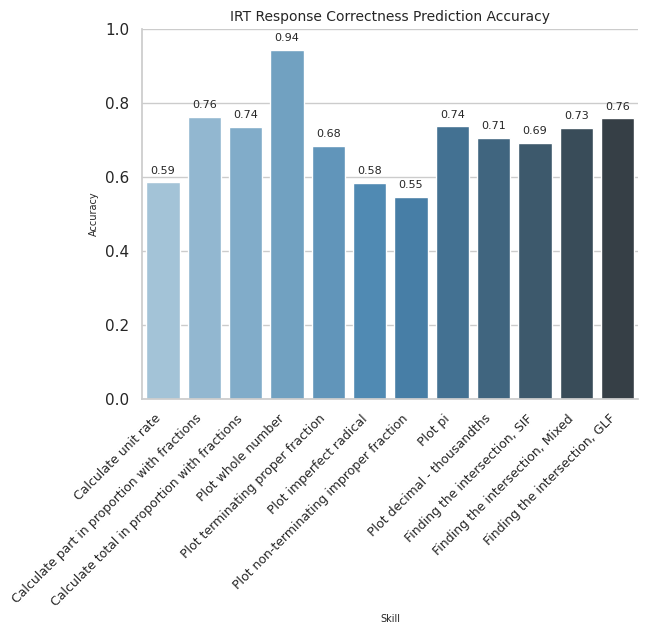

In [10]:
# Assuming you have defined the DataFrame with skill_list and skill_acc
df = pd.DataFrame(zip(skill_list, skill_acc), columns=['Skill', 'Accuracy'])

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the bar graph
ax = sns.barplot(x='Skill', y='Accuracy', data=df, palette="Blues_d")

# Customize the graph
plt.title('IRT Response Correctness Prediction Accuracy', fontsize=10)
plt.xlabel('Skill', fontsize=7)
plt.ylabel('Accuracy', fontsize=7)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylim(0, 1)
#plt.ytick(fontsize=7)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Remove the top and right spines
sns.despine()

# Displaying the graph
#plt.tight_layout()
plt.show()

### IRT vs BKT parameters

In [ ]:
correal_result = []
for s in list(set(ct_df['KC(Default)'])):
  #s = "Calculate part in proportion with fractions"
  model = Model(seed = 42, num_fits = 1)
  model.fit(data_path = 'ct.csv', skills = s, multigs = True, forgets=True, multilearn = True)
  #print(model.params())
  acc = model.evaluate(data_path = 'ct.csv', metric = 'accuracy')

  learn_params= {}
  for i, j in dict(model.params()['value']).items():
    if i[-2] == 'learns':
      #print(i)
      learn_params[i[-1]] = j
    else:
      None

  forget_params= {}
  for i, j in dict(model.params()['value']).items():
    if i[-2] == 'forgets':
      #print(i)
      forget_params[i[-1]] = j
    else:
      None

  guess_params= {}
  for i, j in dict(model.params()['value']).items():
    if i[-2] == 'guesses':
      #print(i)
      guess_params[i[-1]] = j
    else:
      None

  slip_params= {}
  for i, j in dict(model.params()['value']).items():
    if i[-2] == 'slips':
      #print(i)
      slip_params[i[-1]] = j
    else:
      None

  test_acc, user_dic, question_dic, theta, beta = main(s)

  import numpy as np

  def bkt_to_irt(q_id):
      # Extract BKT parameters
      p_guess = guess_params[q_id]
      
      # Convert BKT parameters to IRT parameters
      difficulty = np.log(p_guess)
      # Return IRT parameters
      irt_params = {
          
          'difficulty': difficulty
      }
      return irt_params

  beta_bkt = []
  for q_id in list(question_dic.keys()):
    irt_parameters = bkt_to_irt(q_id)
    #print(irt_parameters)
    beta_bkt.append(irt_parameters['difficulty'])
  print(s)
  print(pd.DataFrame(zip(beta_bkt, beta)).corr().abs())
  correal_result.append(pd.DataFrame(zip(beta_bkt, beta)).corr().abs())


NLLK: 352.118767724453 	 Score: 0.506578947368421
NLLK: 348.42171279015054 	 Score: 0.47368421052631576
NLLK: 345.16553723902376 	 Score: 0.48026315789473684
NLLK: 342.26632025085456 	 Score: 0.48026315789473684
NLLK: 339.6568988647779 	 Score: 0.48026315789473684
NLLK: 337.28358117753413 	 Score: 0.48026315789473684
NLLK: 335.1034429286932 	 Score: 0.48026315789473684
NLLK: 333.0821384928685 	 Score: 0.48026315789473684
NLLK: 331.1921462167422 	 Score: 0.48026315789473684
NLLK: 329.411370784395 	 Score: 0.48026315789473684
NLLK: 327.7220340788835 	 Score: 0.48026315789473684
NLLK: 326.1097966260679 	 Score: 0.48026315789473684
NLLK: 324.5630620737291 	 Score: 0.48026315789473684
NLLK: 323.0724263741799 	 Score: 0.48026315789473684
NLLK: 321.6302411238136 	 Score: 0.48026315789473684
NLLK: 320.23026689366907 	 Score: 0.48026315789473684
NLLK: 318.8673975162734 	 Score: 0.48026315789473684
NLLK: 317.5374403709614 	 Score: 0.48026315789473684
NLLK: 316.23694092449307 	 Score: 0.473684210

<ipython-input-12-592e3713cb23>:50: RuntimeWarning: divide by zero encountered in log
  difficulty = np.log(p_guess)


NLLK: 201.70582954294449 	 Score: 0.6818181818181818
NLLK: 196.443239746433 	 Score: 0.5795454545454546
NLLK: 191.90621095939602 	 Score: 0.6022727272727273
NLLK: 187.97812656887177 	 Score: 0.6022727272727273
NLLK: 184.56017762590648 	 Score: 0.6022727272727273
NLLK: 181.56950172218396 	 Score: 0.6022727272727273
NLLK: 178.93705866418392 	 Score: 0.6022727272727273
NLLK: 176.6055339381062 	 Score: 0.6022727272727273
NLLK: 174.52742087771557 	 Score: 0.6022727272727273
NLLK: 172.66334337210978 	 Score: 0.6022727272727273
NLLK: 170.9806296115897 	 Score: 0.6022727272727273
NLLK: 169.45212087366764 	 Score: 0.6022727272727273
NLLK: 168.05518787825537 	 Score: 0.6022727272727273
NLLK: 166.7709241818101 	 Score: 0.6022727272727273
NLLK: 165.583487329431 	 Score: 0.6022727272727273
NLLK: 164.47956164801474 	 Score: 0.6022727272727273
NLLK: 163.44792032971804 	 Score: 0.6022727272727273
NLLK: 162.4790681551727 	 Score: 0.6022727272727273
NLLK: 161.5649495387015 	 Score: 0.6022727272727273
NL